In [1]:
# import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# read data file
mergedSuperheroes = pd.read_csv('../Datasets/Production_data/Merged_Superhero.csv')
mergedSuperheroes.head()

,Unnamed: 0,Date_Released,Publisher,Superhero_Name,Movie_Title,Rating,IMDB_Votes,Box_Office_Sales,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight,rate,Inflation_Sales
0,0,2008,DC,Batman,The Dark Knight,90.0,"2,029,721",533316061,Male,blue,Human,black,188,-,good,18.5,17.4,6.261131e+08
1,1,2008,DC,Punisher,Punisher: War Zone,60.0,"56,730",7948159,Male,blue,Human,Black,183,-,good,9.5,17.4,9.331139e+06
2,2,2008,Marvel,Iron Man,Iron Man,79.0,"842,429",318298180,Male,blue,Human,Black,198,-,good,38.5,17.4,3.736821e+08
3,3,2008,Marvel,Hulk,The Incredible Hulk,68.0,"388,957",134518390,Male,green,Human,Green,244,green,good,29.5,17.4,1.579246e+08
4,4,2009,Marvel,Wolverine,X-Men Origins: Wolverine,66.0,"431,892",179737340,Male,blue,Human,Black,160,-,good,31.5,17.8,2.117306e+08


In [3]:
# total count of genders = 31
genderCount = mergedSuperheroes['Gender'].count()
genderCount

# # male count = 29
maleCount = mergedSuperheroes.loc[mergedSuperheroes['Gender'] == "Male"].count()
maleCount['Gender']

# # female count = 2
femaleCount = mergedSuperheroes.loc[mergedSuperheroes['Gender'] == "Female"].count()
femaleCount['Gender']


maleCount['Gender'], femaleCount['Gender']

(29, 2)

In [4]:
# calculate percentages for plots
femalePercent = (femaleCount / genderCount) * 100
femalePercent['Gender']

malePercent = (maleCount / genderCount) * 100
malePercent['Gender']

malePercent['Gender'], femalePercent['Gender']

(93.54838709677419, 6.451612903225806)

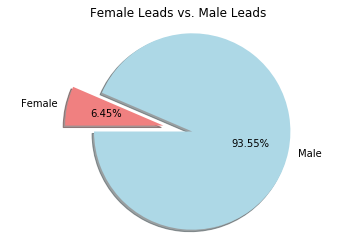

In [5]:
# plot female vs. male characters

plt.title('Female Leads vs. Male Leads')

labels = ("Male", "Female")

colors = ('lightblue', 'lightcoral')
explode = (0.0,  0.3)

percentsByGender = (malePercent['Gender'], femalePercent['Gender'])

plt.pie(percentsByGender, labels=labels, explode=explode, autopct="%1.2f%%",
        shadow=True, startangle=180, colors=colors)

plt.axis('equal')

# save image
plt.savefig("../Images/female_vs_male_leads_pie.png")

plt.show()

In [6]:
# average rating by gender

# groupMales 
groupByMales = mergedSuperheroes.loc[mergedSuperheroes['Gender']=='Male']
avgMaleRatings = groupByMales['Rating'].mean()

# group females
groupByFemales = mergedSuperheroes.loc[mergedSuperheroes['Gender']=='Female']
avgFemaleRatings = groupByFemales['Rating'].mean()

maleValues = groupByMales['Rating'].value_counts()

femaleValues = groupByFemales['Rating'].value_counts()
femaleValues

totalAvgRating = mergedSuperheroes['Rating'].mean()
#totalAvgRating

# avgMaleRatings, avgFemaleRatings



In [7]:
# bar chart for average rating

ratings_df = mergedSuperheroes[["Superhero_Name", "Gender", "Rating", "Box_Office_Sales"]]
len(ratings_df)

groupByMaleBar_df = ratings_df.loc[ratings_df['Gender']=="Male"]
groupByMaleBar_df
ratingMaleValueCount_df = groupByMaleBar_df.Rating.value_counts()
avgRatingMale = groupByMaleBar_df.Rating.mean()
avgRatingMale

groupByFemaleBar_df = ratings_df.loc[ratings_df['Gender']=="Female"]
groupByFemaleBar_df
ratingFemaleValueCount_df = groupByFemaleBar_df.Rating.value_counts()
avgRatingFemale = groupByFemaleBar_df.Rating.mean()
avgRatingFemale

ratingScale = (avgRatingMale, avgRatingFemale)

ratings_df.head()



,Superhero_Name,Gender,Rating,Box_Office_Sales
0,Batman,Male,90.0,533316061
1,Punisher,Male,60.0,7948159
2,Iron Man,Male,79.0,318298180
3,Hulk,Male,68.0,134518390
4,Wolverine,Male,66.0,179737340


In [8]:
# average sales by gender

# group Males 
avgMaleSales = groupByMales['Box_Office_Sales'].mean()
#avgMaleSales_formatted = round(avgMaleSales,2)

# group females

avgFemaleSales = groupByFemales['Box_Office_Sales'].mean()
#avgFemaleSales_formatted = round(avgFemaleSales,2)


round(avgMaleSales,2) , avgFemaleSales

(253053325.24, 393140495.5)

In [9]:
mergedSuperheroes.head()

,Unnamed: 0,Date_Released,Publisher,Superhero_Name,Movie_Title,Rating,IMDB_Votes,Box_Office_Sales,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight,rate,Inflation_Sales
0,0,2008,DC,Batman,The Dark Knight,90.0,"2,029,721",533316061,Male,blue,Human,black,188,-,good,18.5,17.4,6.261131e+08
1,1,2008,DC,Punisher,Punisher: War Zone,60.0,"56,730",7948159,Male,blue,Human,Black,183,-,good,9.5,17.4,9.331139e+06
2,2,2008,Marvel,Iron Man,Iron Man,79.0,"842,429",318298180,Male,blue,Human,Black,198,-,good,38.5,17.4,3.736821e+08
3,3,2008,Marvel,Hulk,The Incredible Hulk,68.0,"388,957",134518390,Male,green,Human,Green,244,green,good,29.5,17.4,1.579246e+08
4,4,2009,Marvel,Wolverine,X-Men Origins: Wolverine,66.0,"431,892",179737340,Male,blue,Human,Black,160,-,good,31.5,17.8,2.117306e+08


In [10]:
group_gender = mergedSuperheroes.groupby(['Gender'])
Sales_avg = group_gender['Inflation_Sales'].mean()
Rating_avg = group_gender['Rating'].mean()
Superhero_Gender_AVG_df = pd.DataFrame({'Average Sales': Sales_avg, 'Average Rating': Rating_avg})
Superhero_Gender_AVG_df.head()

,Average Sales,Average Rating
Gender,,
Female,3.995327e+08,72.000000
Male,2.729656e+08,71.482759


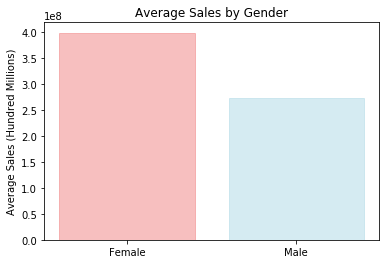

In [13]:
# Set x axis and tick locations
x_axis = np.arange(len(Superhero_Gender_AVG_df))
#plt.xticks(x_axis, Superhero_Gender_AVG_df.index, rotation = 45)
plt.xticks(x_axis, Superhero_Gender_AVG_df.index)
barList = plt.bar(x_axis, Superhero_Gender_AVG_df['Average Sales'], alpha=.5, align="center")
barList[0].set_color('lightcoral')
barList[1].set_color('lightblue')

#Labels and Title
#plt.xlabel("Gender")
plt.ylabel("Average Sales (Hundred Millions)")
plt.title("Average Sales by Gender")



# save plot
plt.savefig("../Images/avg_sales_by_gender_bar_plot.png")

plt.show()

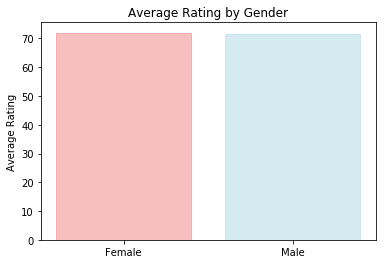

In [14]:
# Set x axis and tick locations
x_axis = np.arange(len(Superhero_Gender_AVG_df))
plt.xticks(x_axis, Superhero_Gender_AVG_df.index)
barList = plt.bar(x_axis, Superhero_Gender_AVG_df['Average Rating'], color='b', alpha=.5, align="center")
barList[0].set_color('lightcoral')
barList[1].set_color('lightblue')


#Labels and Title
#plt.xlabel("Gender")
plt.ylabel("Average Rating")
plt.title("Average Rating by Gender")
plt.ylim


# save plot
plt.savefig("../Images/avg_rating_by_gender_bar_plot.png")

plt.show()